# Étude de cas

In [14]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scripts.main import parse_csv

In [ ]:
data_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))), 'data', 'Country-data.csv')
data = parse_csv(data_path, ignore_headers=False) # Here, data contains something like [['Afghanistan', 90.2, 10.0, 7.58, 44.9, ...]

# Split the list into three lists: headers, country names and numerical data
headers = data[0]
country_names = [row[0] for row in data[1:]]
numerical_data = [row[1:] for row in data[1:]]

In [16]:
from numpy import array, identity, transpose, matmul, std, mean
from numpy.linalg import eig

X = array(numerical_data)

# Le nombre de points
n = len(numerical_data)

# Le nombre de variables
p = len(headers) - 1

# La matrice des données centrées, c’est-à-dire la somme = 0 sur chaque colonne
Y = X - matmul(transpose(array([n * [1]])), transpose(array([[mean(variable)] for variable in transpose(X)])))

# La matrice des données centrées et réduites, qui en plus a l’écart type constant = 1 sur chaque colonne
Z = matmul (Y, array(list(map (lambda variable : [1./std(variable)], transpose(X)))) * identity(p))

# La matrice (symétrique) de variance/covariance des données centrées réduites
R = matmul (matmul(transpose(Z), 1./n * identity (n)), Z)

# Les vecteurs propres de R
eigenvectors = eig(R)[1]

# Les 2 composantes principals = 2 nouvelles variables contenant le plus d’information possible des 9 variables initiales
components = [matmul(Z, eigenvectors[:,0]), matmul(Z, eigenvectors[:,1])]

# La matrice initiale, projetée sur 2 nouvelles colonnes qui représentent les 2 composantes principales
data_reduced = [[components[0][i], components[1][i]] for i in range(n)]

print(data_reduced)

[[np.float64(2.913024587396588), np.float64(-0.09562057550551217)], [np.float64(-0.4299113299319383), np.float64(0.5881556664216984)], [np.float64(0.2852250773700539), np.float64(0.4551744133397677)], [np.float64(2.9324226542292737), np.float64(-1.6955550705215487)], [np.float64(-1.0335758664708328), np.float64(-0.13665870884235135)], [np.float64(-0.022407261573743925), np.float64(1.779186575829488)], [np.float64(0.10158373658107384), np.float64(0.5682517238414162)], [np.float64(-2.3421646096858817), np.float64(1.9884591539619931)], [np.float64(-2.9737636642043057), np.float64(0.734688658607829)], [np.float64(0.18148699731199217), np.float64(0.402865873483636)], [np.float64(-1.2687438639868236), np.float64(0.6565883632526904)], [np.float64(-1.670996395911488), np.float64(-0.5611624925384958)], [np.float64(1.1238509345045717), np.float64(0.9613974045352938)], [np.float64(-1.0813741969947284), np.float64(0.481969530136348)], [np.float64(-0.5800251522399523), np.float64(-0.535326833980048

## génération des figures

K-MEANS CLUSTERING

--- K-means avec k=2 ---
Initialized centroids:
[[-0.08186784  0.56780394]
 [-3.6795426  -4.76548605]]
Iteration 1 / 100
 Cluster sizes: [162   5]
 Centroid shifts: [0.48849775 0.86665612] max: 0.8666561183647767
Iteration 2 / 100
 Cluster sizes: [162   5]
 Centroid shifts: [0. 0.] max: 0.0
Converged at iteration 2, max shift 0
Final centroids:
[[ 0.1336537   0.12941996]
 [-4.33037993 -4.19320675]]
Final SSE: 761.611


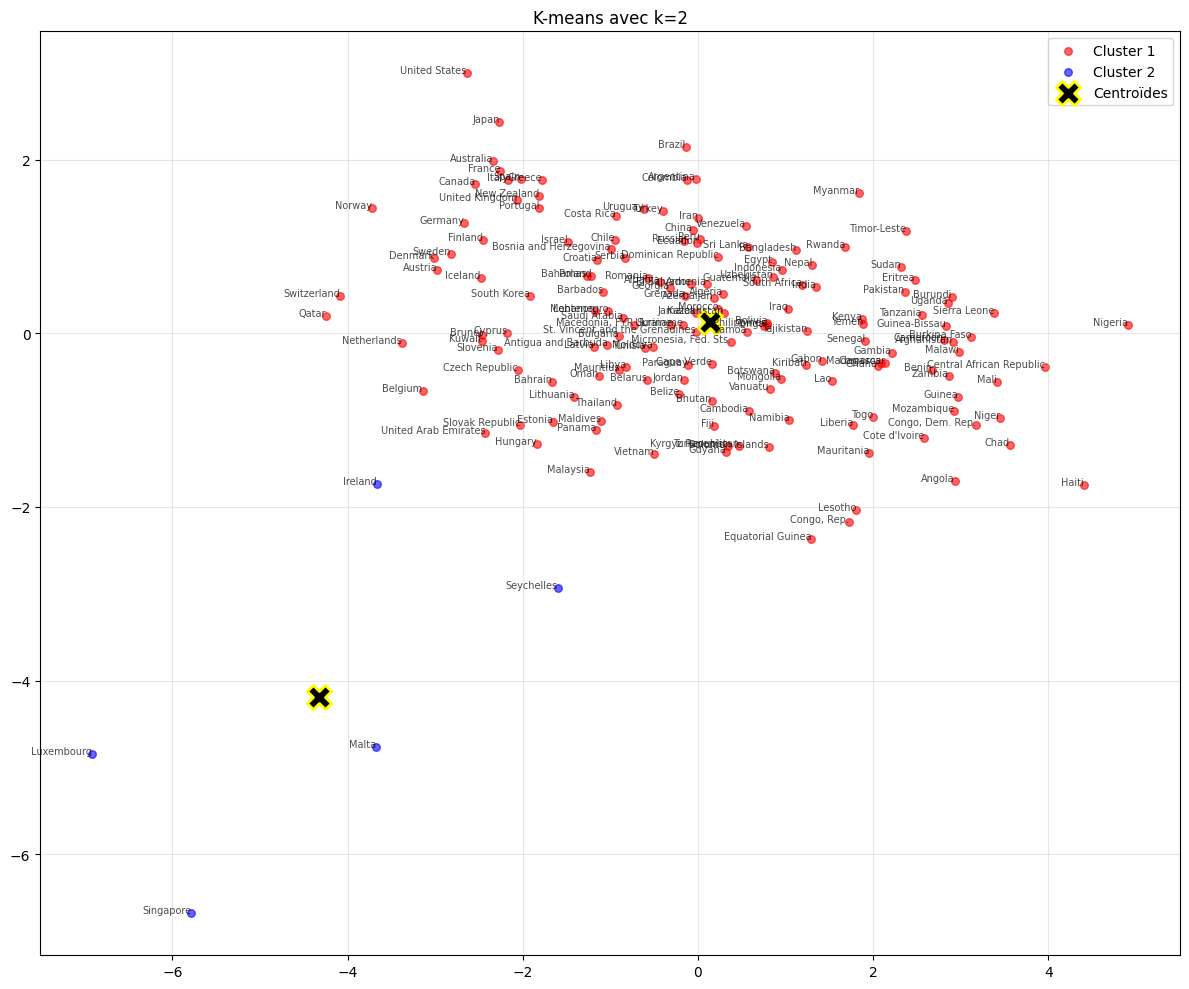


--- K-means avec k=3 ---
Initialized centroids:
[[-1.60259775 -2.93912057]
 [-2.67142195  1.2736099 ]
 [-2.26588199  2.43559383]]
Iteration 1 / 100
 Cluster sizes: [67 67 33]
 Centroid shifts: [3.18198012 1.84385582 2.74402043] max: 3.1819801190107313
Iteration 2 / 100
 Cluster sizes: [62 73 32]
 Centroid shifts: [0.96969774 0.79448704 0.48757334] max: 0.9696977350698078
Iteration 3 / 100
 Cluster sizes: [53 67 47]
 Centroid shifts: [0.33473631 0.19169441 0.35327698] max: 0.35327698236027477
Iteration 4 / 100
 Cluster sizes: [49 61 57]
 Centroid shifts: [0.16663976 0.13159323 0.19663158] max: 0.196631578197685
Iteration 5 / 100
 Cluster sizes: [44 56 67]
 Centroid shifts: [0.20423692 0.12111652 0.1696806 ] max: 0.20423692263726945
Iteration 6 / 100
 Cluster sizes: [42 53 72]
 Centroid shifts: [0.07261816 0.07671349 0.06287483] max: 0.07671349104255994
Iteration 7 / 100
 Cluster sizes: [41 50 76]
 Centroid shifts: [0.03957906 0.07621405 0.04609054] max: 0.07621404759011917
Iteration 8 

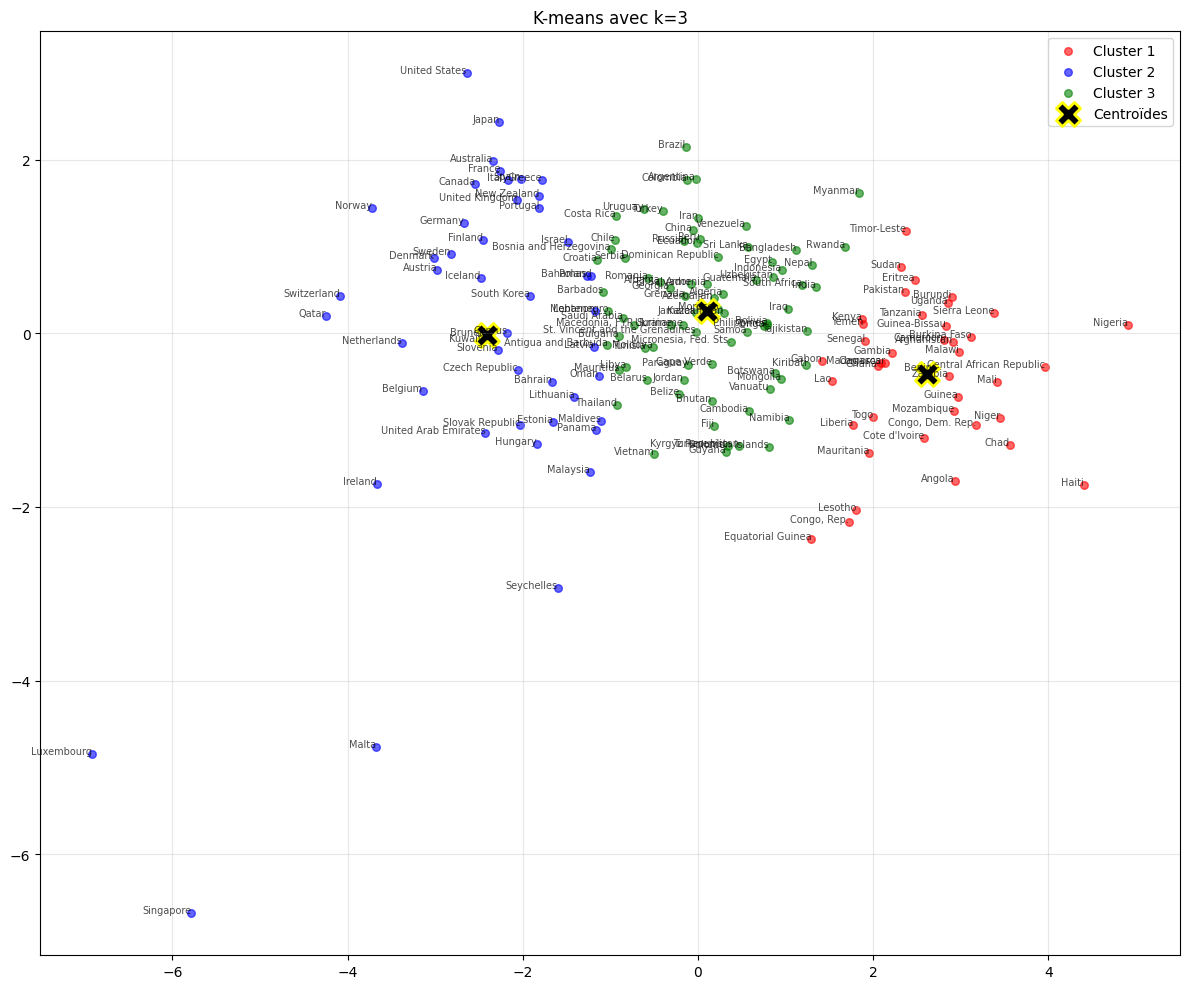


CLUSTERING HIÉRARCHIQUE


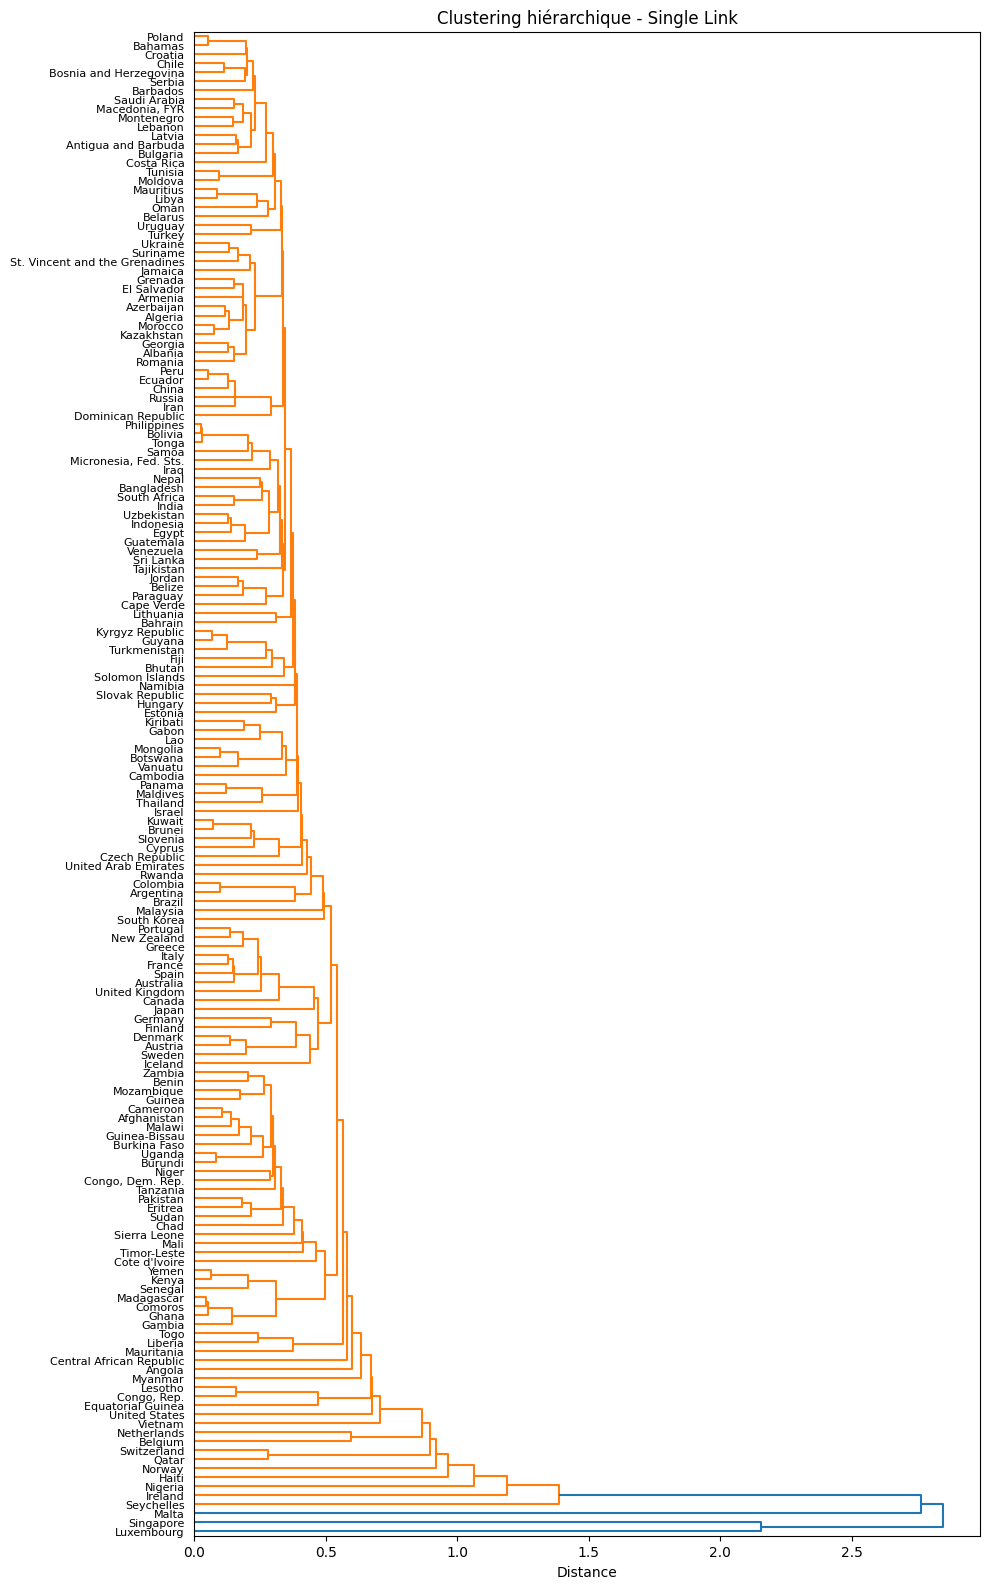

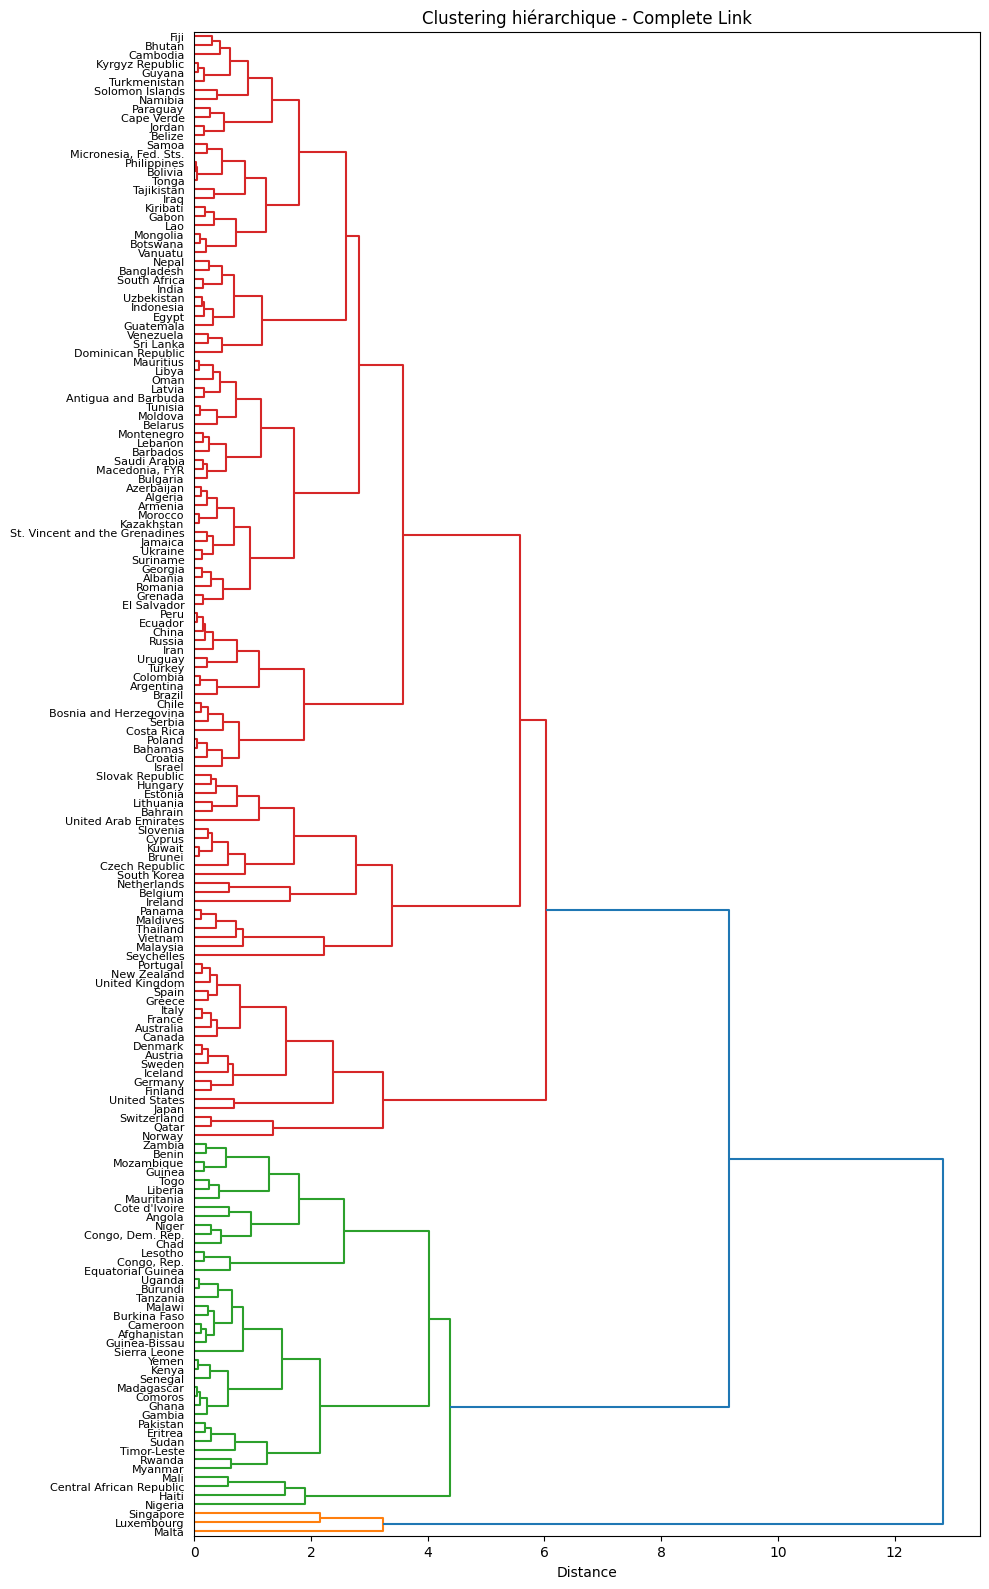


✓ Toutes les visualisations ont été générées avec succès !


In [17]:
from scripts.main import k_means
from scipy.cluster.hierarchy import dendrogram, linkage

# ===== 1. K-MEANS CLUSTERING =====
print("=" * 50)
print("K-MEANS CLUSTERING")
print("=" * 50)

# K-means avec k=2
print("\n--- K-means avec k=2 ---")
centroids_k2, sse_k2 = k_means(data_reduced, 2)

# Visualisation k=2
plt.figure(figsize=(12, 10))
data_array = np.array(data_reduced)

# Assigner chaque point au cluster le plus proche
distances_k2 = np.linalg.norm(data_array[:, None, :] - centroids_k2[None, :, :], axis=2)
labels_k2 = np.argmin(distances_k2, axis=1)

# Plot des points colorés par cluster
colors = ['red', 'blue', 'green']
for i in range(2):
    cluster_points = data_array[labels_k2 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i+1}', s=30, alpha=0.6)

# Plot des centroïdes
plt.scatter(centroids_k2[:, 0], centroids_k2[:, 1], 
            c='black', marker='X', s=300, edgecolors='yellow', linewidths=2,
            label='Centroïdes')

# Ajouter les labels pour chaque point
for i, country in enumerate(country_names):
    plt.annotate(country, (data_array[i, 0], data_array[i, 1]), 
                fontsize=7, alpha=0.7, ha='right')

plt.title('K-means avec k=2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# K-means avec k=3
print("\n--- K-means avec k=3 ---")
centroids_k3, sse_k3 = k_means(data_reduced, 3)

# Visualisation k=3
plt.figure(figsize=(12, 10))

# Assigner chaque point au cluster le plus proche
distances_k3 = np.linalg.norm(data_array[:, None, :] - centroids_k3[None, :, :], axis=2)
labels_k3 = np.argmin(distances_k3, axis=1)

# Plot des points colorés par cluster
for i in range(3):
    cluster_points = data_array[labels_k3 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i+1}', s=30, alpha=0.6)

# Plot des centroïdes
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], 
            c='black', marker='X', s=300, edgecolors='yellow', linewidths=2,
            label='Centroïdes')

# Ajouter les labels pour chaque point
for i, country in enumerate(country_names):
    plt.annotate(country, (data_array[i, 0], data_array[i, 1]), 
                fontsize=7, alpha=0.7, ha='right')

plt.title('K-means avec k=3')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===== 2. CLUSTERING HIÉRARCHIQUE =====
print("\n" + "=" * 50)
print("CLUSTERING HIÉRARCHIQUE")
print("=" * 50)

# Single link et Complete link
single_link = linkage(data_reduced, method='single')
complete_link = linkage(data_reduced, method='complete')

# Visualisation Single Link (labels à gauche, graphe à droite)
plt.figure(figsize=(10, 16))
dendrogram(single_link, labels=country_names, orientation='right', leaf_font_size=8)
plt.title('Clustering hiérarchique - Single Link')
plt.xlabel('Distance')
plt.tight_layout()
plt.show()

# Visualisation Complete Link (labels à gauche, graphe à droite)
plt.figure(figsize=(10, 16))
dendrogram(complete_link, labels=country_names, orientation='right', leaf_font_size=8)
plt.title('Clustering hiérarchique - Complete Link')
plt.xlabel('Distance')
plt.tight_layout()
plt.show()

print("\n✓ Toutes les visualisations ont été générées avec succès !")